<a href="https://colab.research.google.com/github/sidharth-ds/Credit-card-Default-prediction/blob/main/Credit_Card_Default_Prediction_sidharth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [110]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV

In [111]:
# Importing the dataset
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Features Description

We have records of 30000 customers. Below are the description of all features:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)


In [112]:
df.info() # EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [113]:
df.describe()  # statistical EDA

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [114]:
df.isnull().sum()  # checking NULL values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [115]:
df.duplicated().sum()   # checking for identical rows if present

0

***INTERPRETATIONS:***
* ***No null values or duplicates are found in our dataset.***

# **Exploratory Data Analysis**

In [116]:
# Rename the column for better understanding
df = df.rename(columns={'default.payment.next.month': 'DEFAULT_PAYMENT','PAY_0': 'PAY_1'})
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [117]:
df['DEFAULT_PAYMENT'] = df['DEFAULT_PAYMENT'].map({0:'No-Default', 1:'Default'})

**Target Variable**

No-Default    23364
Default        6636
Name: DEFAULT_PAYMENT, dtype: int64


Text(0.5, 1.0, 'Default Credit Card Client counts')

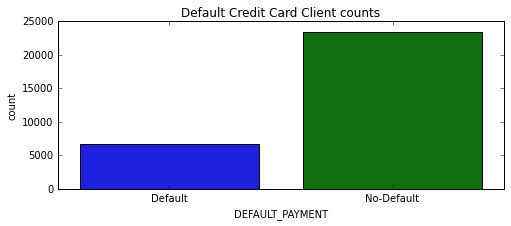

In [118]:
# plotting value counts of dependent variable
print(df['DEFAULT_PAYMENT'].value_counts())
plt.figure(figsize=(8,3))
plt.style.use('fast')
sns.countplot(x = 'DEFAULT_PAYMENT', data = df)
plt.title('Default Credit Card Client counts')

***INTERPRETATION:***
* *Defaulters are less as compared to the Non-Defaulters in the given dataset. The dataset is skewed towards 1 class*



***Categorical variable 1/3:***

In [119]:
print(df['SEX'].value_counts())  # value counts of "SEX"

2    18112
1    11888
Name: SEX, dtype: int64


Text(0.5, 1.0, 'SEX v/s COUNT \n Male=1, Female=2')

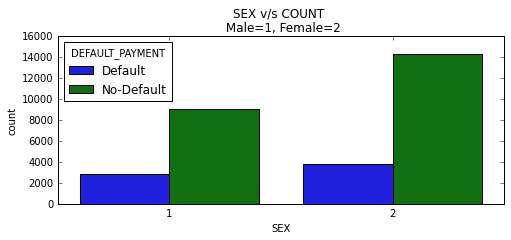

In [120]:
# Plot
plt.figure(figsize=(8,3))
plt.style.use('fast')
sns.countplot(x = 'SEX', data = df, hue="DEFAULT_PAYMENT")
plt.title('SEX v/s COUNT \n Male=1, Female=2')

***INTERPRETATION:***
* *Number of Male credit card holder is less than Female.*

***Categorical variable 2/3:***

In [121]:
df['EDUCATION'].value_counts()  # EDUCATION value counts

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [122]:
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})  # rectifying the data

Text(0.5, 1.0, 'EDUCATION counts \n  Others = 0; Graduate school = 1; University = 2; High school = 3\n')

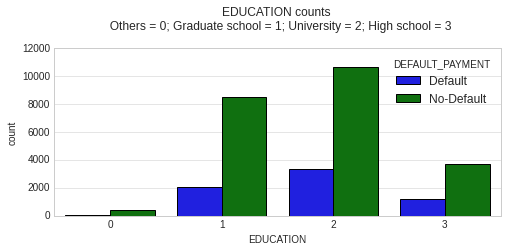

In [123]:
# plot
plt.figure(figsize=(8,3))
plt.style.use('seaborn-whitegrid')
sns.countplot(x = 'EDUCATION', data = df, hue="DEFAULT_PAYMENT")
plt.title('EDUCATION counts \n  Others = 0; Graduate school = 1; University = 2; High school = 3\n')

***INTERPRETATION:***
* *More number of credit card holders are university students followed by Graduates and then High school students.*

***Categorical variable 3/3:***

In [124]:
# MARRIAGE value counts
print(df['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


In [125]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})  # rectifying the data

Text(0.5, 1.0, 'MARRIAGE counts \n Married=1, Single=2, Others=3 \n')

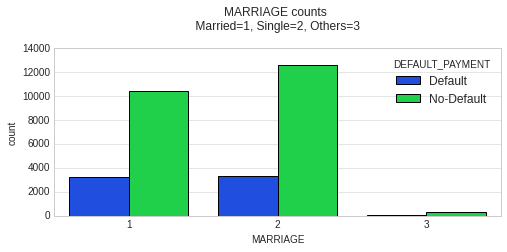

In [126]:
# plot
plt.figure(figsize=(8,3))
plt.style.use('seaborn-bright')
sns.countplot(x = 'MARRIAGE', data = df, hue="DEFAULT_PAYMENT")
plt.title('MARRIAGE counts \n Married=1, Single=2, Others=3 \n')

***INTERPRETATION:***
* *More number of credit card holders are Single.*

***Continuous Variable 1/2:***

Text(0.5, 1.0, 'AGE counts')

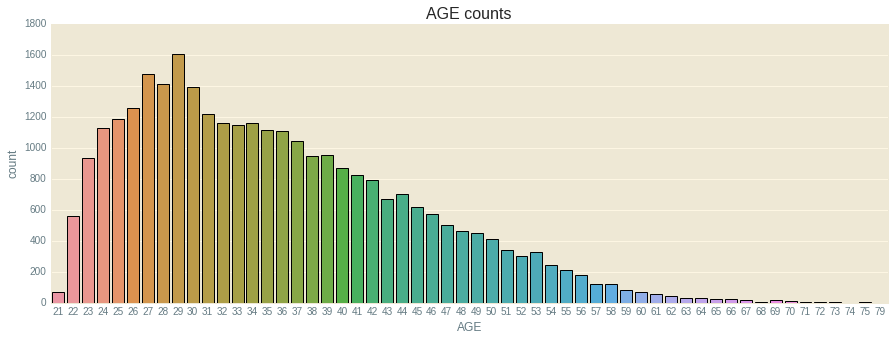

In [127]:
# AGE value counts
plt.figure(figsize=(15,5))
plt.style.use('Solarize_Light2')
sns.countplot(x = 'AGE', data = df)
plt.title('AGE counts')

Text(0.5, 1.0, 'Default vs Age \n')

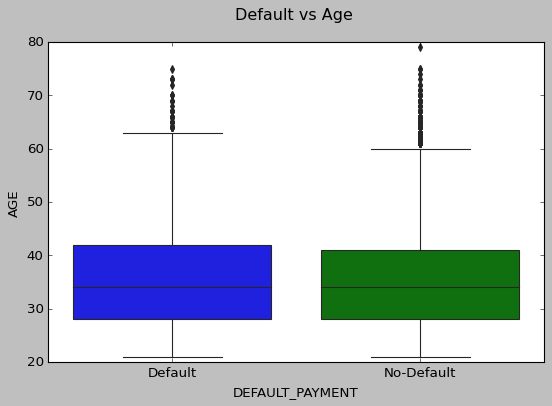

In [128]:
plt.style.use('classic')
plt.figure(figsize=(8,5))
sns.boxplot(x='DEFAULT_PAYMENT',y='AGE',data=df)
plt.title('Default vs Age \n')

***INTERPRETATION:***
* *No:of credit card holders are high between age 23 to 40.*

***Continuous Variable 2/2:***

Text(0.5, 1.0, 'Default vs Amount of the given credit (NT dollar) \n')

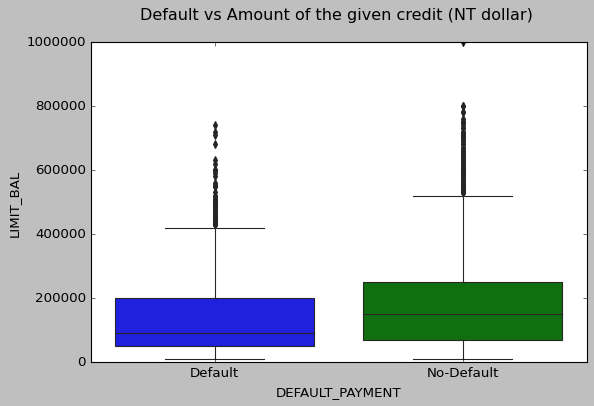

In [129]:
plt.style.use('classic')
plt.figure(figsize=(8,5))
sns.boxplot(x='DEFAULT_PAYMENT',y='LIMIT_BAL',data=df)
plt.title('Default vs Amount of the given credit (NT dollar) \n')

***INTERPRETATION:***
* *Default mostly happens when amount of credit is less than 2,00,000.*

**Payment variables**

In [130]:
df['DEFAULT_PAYMENT'] = df['DEFAULT_PAYMENT'].map({'No-Default':0, 'Default':1})  # renaming the values of target variable

In [131]:
def getColumnsNames(prefix):                      # function for getting columns
    return [prefix+str(x) for x in range(1,7)]

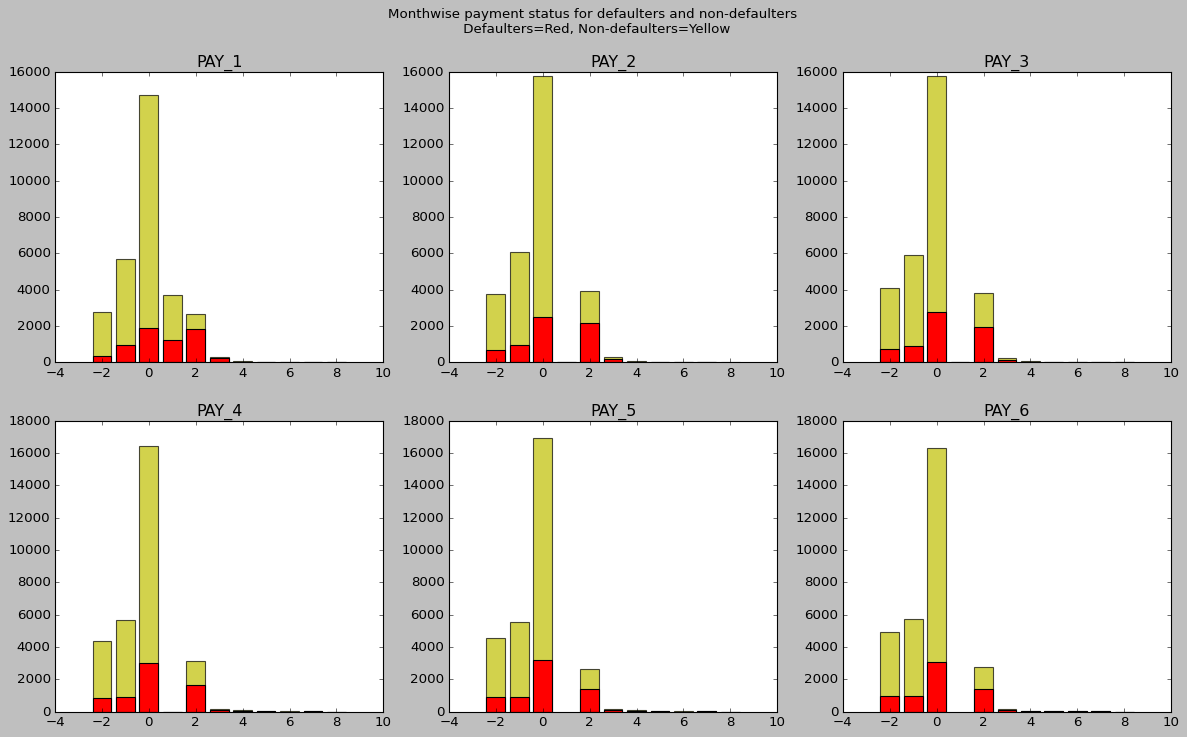

In [132]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,10)

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['DEFAULT_PAYMENT']==1)].value_counts()
    
    ax[row,col].bar(d.index, d, align='center', color='y',alpha = 0.7)
    ax[row,col].bar(x.index, x, align='center', color='red')

    ax[row,col].set_title(pay_status_columns[i])
    plt.suptitle("Monthwise payment status for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")

***INTERPRETATION:***
* *The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.*
* *more people in the category of 0*
* *payment delay beyond 2 months is very less*



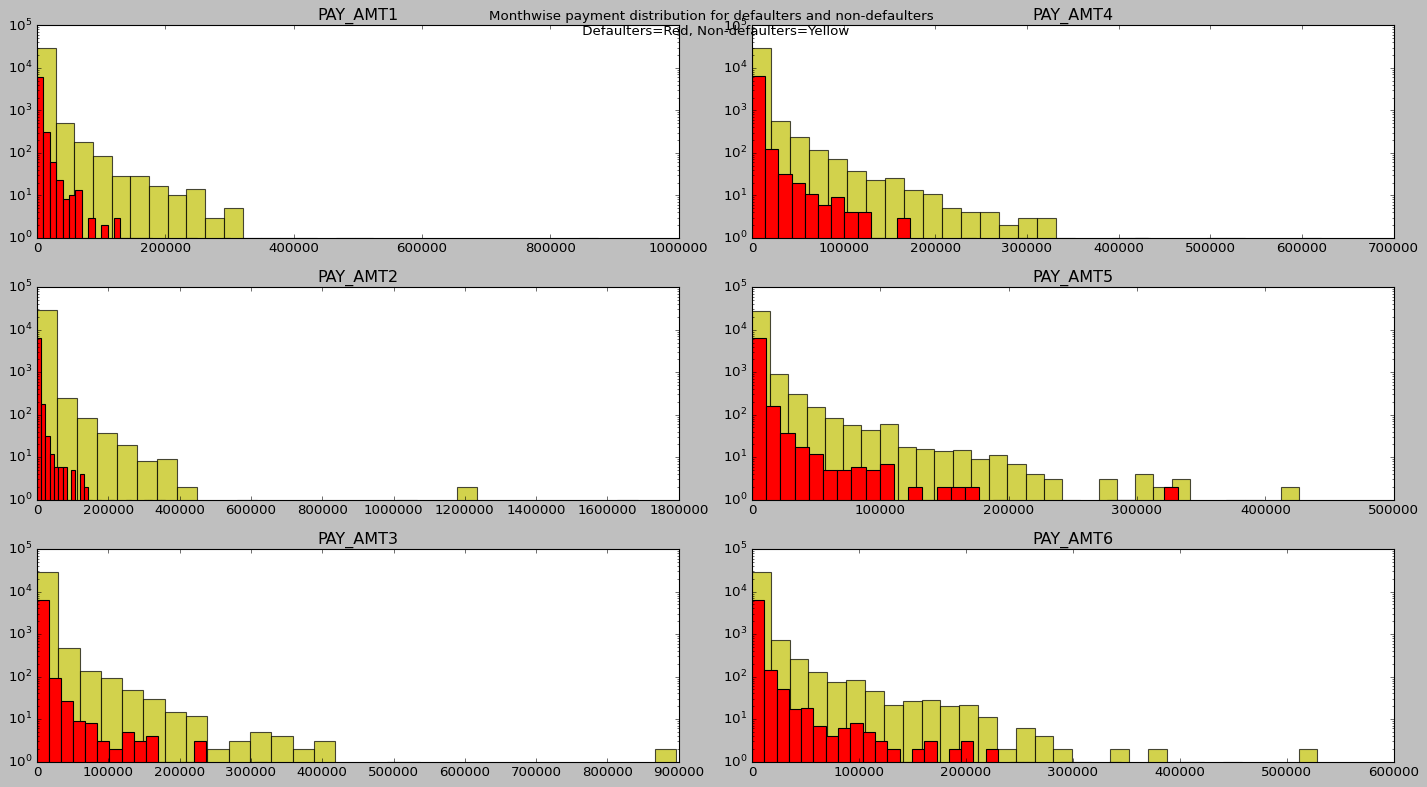

In [133]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,10)

for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color='y',alpha = 0.7)
    ax[row,col].hist(df[pay_amt_columns[i]][(df['DEFAULT_PAYMENT']==1)],30,color='red')
    ax[row,col].set_title(pay_amt_columns[i])
    plt.suptitle("Monthwise payment distribution for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")

#adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')

plt.tight_layout()

***INTERPRETATION:***
* *The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.*
* *Previous payment amount of Defaulters is less than that of non-defaulters*



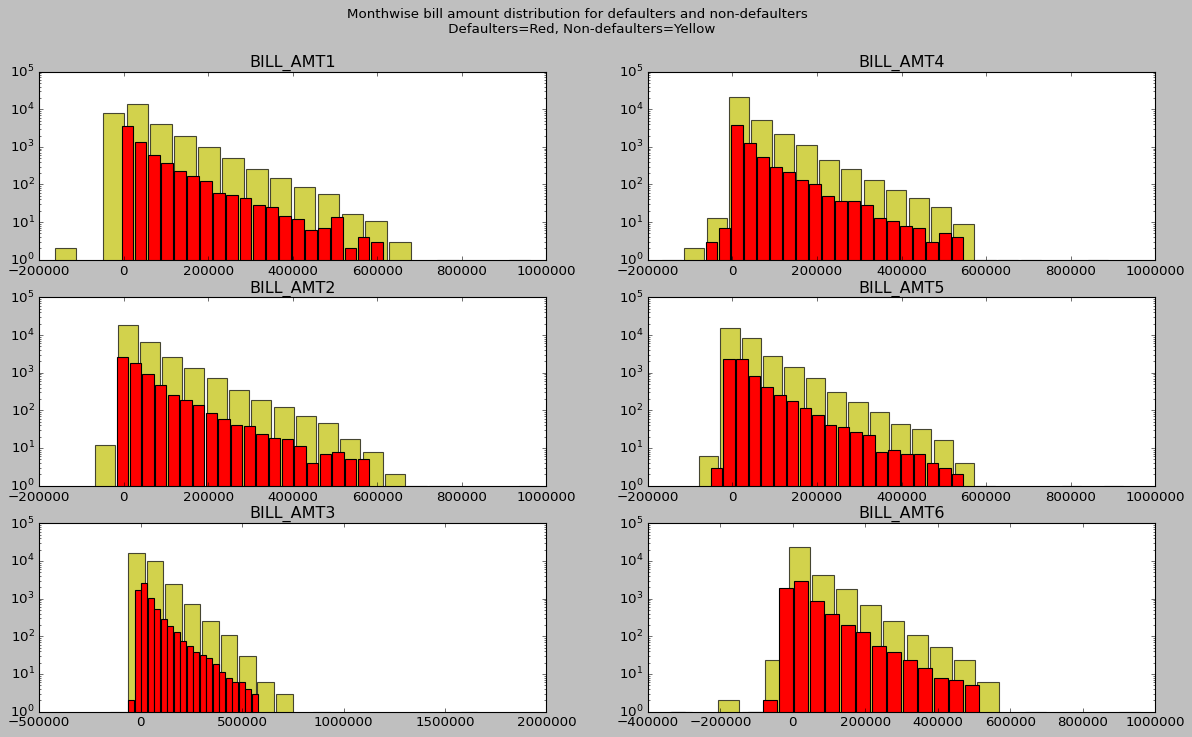

In [134]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,10)

for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color='y',alpha = 0.7)
    ax[row,col].hist(df[bill_atm_columns[i]][(df['DEFAULT_PAYMENT']==1)],20,rwidth=0.9,color='red')
    ax[row,col].set_title(bill_atm_columns[i])
    plt.suptitle("Monthwise bill amount distribution for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")

    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')

***Interpretation:***
* *The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters.*
* *bill statement for defaulters is less than that of non-defaulters.*



**Renaming Columns**

In [135]:
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [136]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT_PAYMENT'],
      dtype='object')

# SMOTE (Synthetic Minority Oversampling Technique)

* *Since the dataset is Skewed towards 1 class, we need to balance this imbalanced dataset.*

In [137]:
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['DEFAULT_PAYMENT'])

print('Original shape of Dataset', len(df))
print('Resampled shape of Dataset', len(y_smote))

Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [138]:
columns = list(df.columns)
columns.pop()

'DEFAULT_PAYMENT'

In [139]:
# dumping this into a dataframe
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['DEFAULT_PAYMENT'] = y_smote
balance_df.shape

(46728, 25)

Text(0.5, 1.0, '0 = No_Default, 1 = Default')

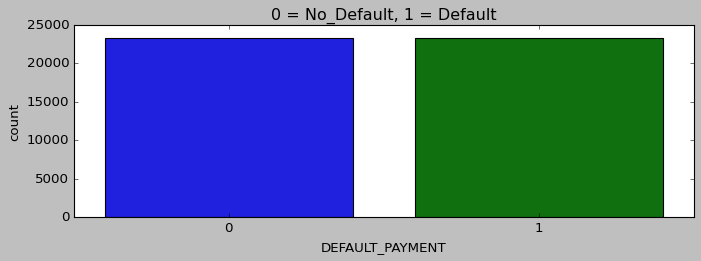

In [140]:
# plotting
plt.style.use('classic')
plt.figure(figsize=(10,3))
sns.countplot('DEFAULT_PAYMENT', data = balance_df)
plt.title('0 = No_Default, 1 = Default')

### Feature Engineering


In [141]:
df_fr = balance_df.copy()

In [142]:
# data cleaning
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

print(df_fr['EDUCATION'].unique())
print(df_fr['MARRIAGE'].unique())

[2 1 3 4]
[1 2 3]


In [143]:
# converting into string type for the purpose of encoding:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [144]:
# One Hot Encoding:
df_fr = pd.get_dummies(df_fr, columns=['EDUCATION','MARRIAGE'])
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [145]:
# LABEL ENCODING FOR SEX:
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)

In [146]:
df_fr.drop(['ID','EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)  # dropping unnecessary columns
df_fr.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,1,0,0,0,0,0,0,0,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,1,0,0,0,0,0,0,0,0


In [147]:
df_fr.shape

(46728, 81)

# Modelling:

### **Logistic Regression**

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
df_log_reg = df_fr.copy()

In [150]:
X = df_log_reg.drop(['DEFAULT_PAYMENT'],axis=1)   # features
y = df_log_reg['DEFAULT_PAYMENT']               # target

columns = X.columns

scaler = StandardScaler()      # scaling
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)  # splitting

In [151]:
# hyperparameter tuning for logistic regression:

param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

* Penalty: is used to specify the method of penalization of the coefficients of noncontributing variables.
    * Lasso (L1) performs feature selection as it shrinks the less important feature’s coefficient to zero.
    * Ridge (L2) all variables are included in model, though some are shrunk. Less computationally intensive than lasso.

* C: is the inverse of the regularization term (1/lambda). It tells the model how much large parameters are penalized, smaller values result in larger penalization; must be a positive float.

In [152]:
optimized_clf = grid_lr_clf.best_estimator_       # best_estimator_ which gave highest score (or smallest loss)

In [153]:
grid_lr_clf.best_params_         # Parameter setting that gave the best results on the hold out data.

{'C': 0.1, 'penalty': 'l2'}

In [154]:
grid_lr_clf.best_score_         # Mean cross-validated score of the best_estimator

0.7517170638243192

In [155]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]    

# Predictions
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

**Model Evaluation**

In [156]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7529625962244866
The accuracy on test data is  0.7546851695739576


[[6292 2364]
 [1419 5346]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

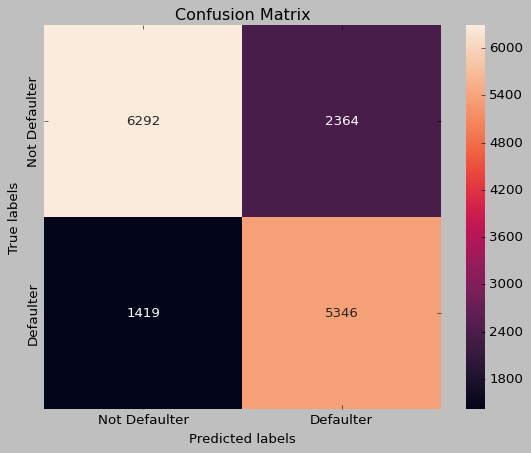

In [157]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(test_class_preds,y_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g') # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [158]:
# all metrics
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

In [159]:
# Classification report
report = classification_report(test_class_preds,y_test)   
print("\nclassification_report: \n",report)


classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      8656
           1       0.69      0.79      0.74      6765

    accuracy                           0.75     15421
   macro avg       0.75      0.76      0.75     15421
weighted avg       0.76      0.75      0.76     15421



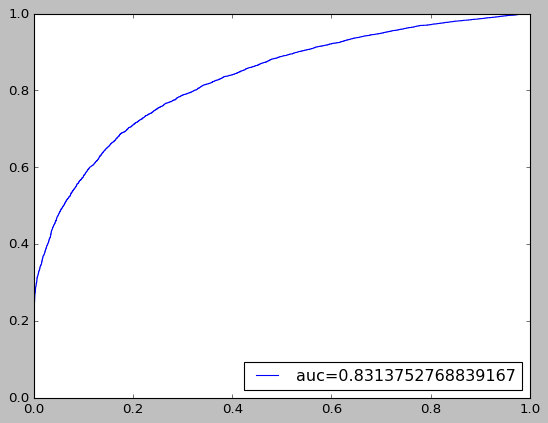

In [160]:
# AUC-ROC curve:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_lr

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

**Feature importances**

In [161]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]   # top 10

Text(0.5, 1.0, 'Feature importances via coefficients')

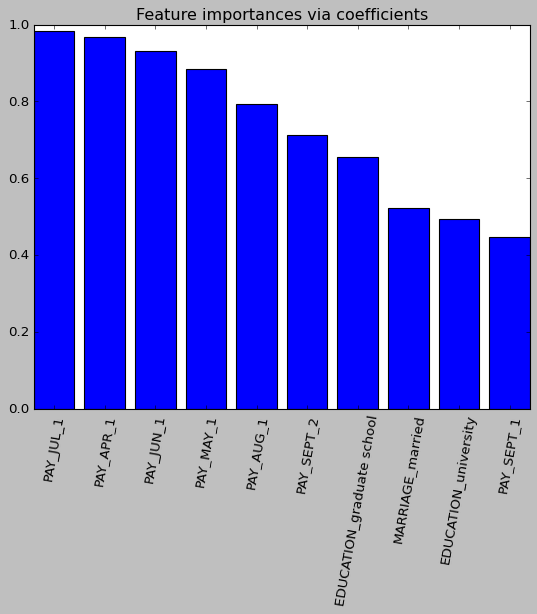

In [162]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")

### **Decision** **Tree**

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
X = df_fr.drop(['DEFAULT_PAYMENT'],axis=1)
y = df_fr['DEFAULT_PAYMENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)  # splitting

In [165]:
# hyper parameter tuning:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [166]:
grid_DTC_clf.best_score_        # Mean cross-validated score of the best_estimator

0.7198068754300978

In [167]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_      # best_estimator_ which gave highest score (or smallest loss)

In [168]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [169]:
grid_DTC_clf.best_params_         # Parameter setting that gave the best results on the hold out data.

{'max_depth': 20, 'min_samples_split': 0.1}

In [170]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7087232887213722
The accuracy on test data is  0.7078658971532326


In [171]:
# all metrics
test_accuracy_dt = accuracy_score(test_class_preds,y_test)
test_precision_dt = precision_score(test_class_preds,y_test)
test_recall_score_dt = recall_score(test_class_preds,y_test)
test_f1_score_dt = f1_score(test_class_preds,y_test)
test_roc_score_dt = roc_auc_score(test_class_preds,y_test)

In [172]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(test_class_preds,y_test)   
print("\nclassification_report: \n",report)


classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.73      8700
           1       0.64      0.74      0.69      6721

    accuracy                           0.71     15421
   macro avg       0.71      0.71      0.71     15421
weighted avg       0.72      0.71      0.71     15421



### **Random Forest**

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
X = df_fr.drop(['DEFAULT_PAYMENT'],axis=1)
y = df_fr['DEFAULT_PAYMENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)  # splitting

In [175]:
# hyper parameter tuning:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [176]:
grid_rf_clf.best_score_

0.8243844318093677

In [177]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [178]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [179]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [180]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9990098061136488
The accuracy on test data is  0.8395694183256598


In [181]:
# all metrics
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

In [182]:
# Classification report
report = classification_report(test_class_preds,y_test)   
print("\nclassification_report: \n",report)


classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      8161
           1       0.81      0.86      0.83      7260

    accuracy                           0.84     15421
   macro avg       0.84      0.84      0.84     15421
weighted avg       0.84      0.84      0.84     15421



In [183]:
len(optimal_rf_clf.feature_importances_)

80

([<matplotlib.axis.XTick at 0x7fc7d96d9c50>,
 <a list of 10 Text major ticklabel objects>)

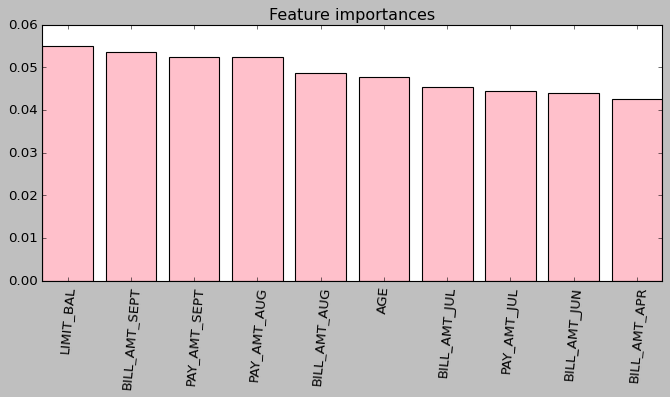

In [184]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_, index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf', ascending=False)[:10]
                                    
plt.subplots(figsize=(10,4))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'], color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)

In [185]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [186]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

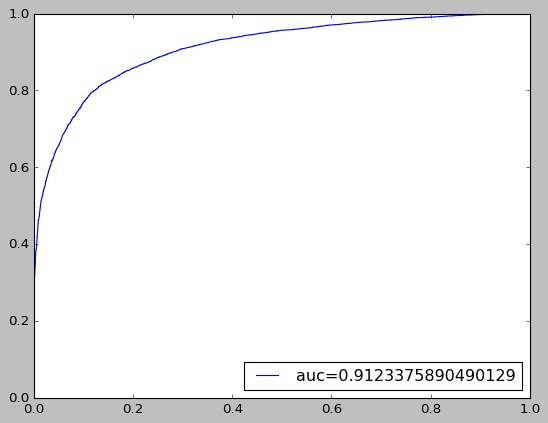

In [187]:
# AUC-ROC curve:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

### **XGBoost**

In [188]:
from xgboost import  XGBClassifier

In [189]:
X = df_fr.drop(['DEFAULT_PAYMENT'],axis=1)
y = df_fr['DEFAULT_PAYMENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)  # splitting

In [190]:
# Hyperparameter tuning:
param_test1 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=5, n_estimators=140),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [191]:
gsearch1.best_score_

0.8169420241226342

In [192]:
optimal_xgb = gsearch1.best_estimator_optimal_xgb = gsearch1.best_estimator_

In [193]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [194]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.8993196409748618
The accuracy on test data is  0.8251734647558524


In [195]:
# all metrics
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

In [196]:
# Classification report
report = classification_report(test_class_preds,y_test)   
print("\nclassification_report: \n",report)


classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      8383
           1       0.78      0.86      0.82      7038

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.82     15421
weighted avg       0.83      0.83      0.83     15421



In [197]:
pd.DataFrame(optimal_xgb.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]

,importance_xgb
PAY_JUL_1,0.153803
PAY_AUG_2,0.123481
PAY_AUG_1,0.100075
PAY_SEPT_2,0.065756
PAY_JUN_1,0.046646
PAY_APR_1,0.040272
PAY_SEPT_1,0.039810
PAY_MAY_1,0.039524
SEX,0.033811
MARRIAGE_married,0.030097


<BarContainer object of 10 artists>

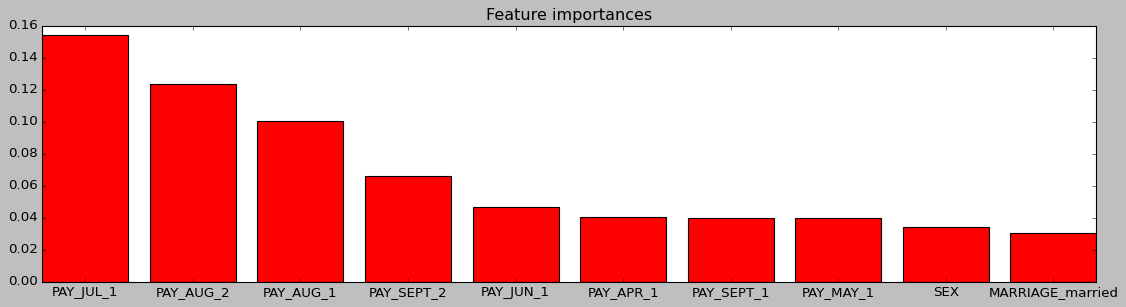

In [198]:
# Feature Importance plotting:
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]
                                    
plt.subplots(figsize=(17,4))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'], color="r",  align="center")

In [199]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

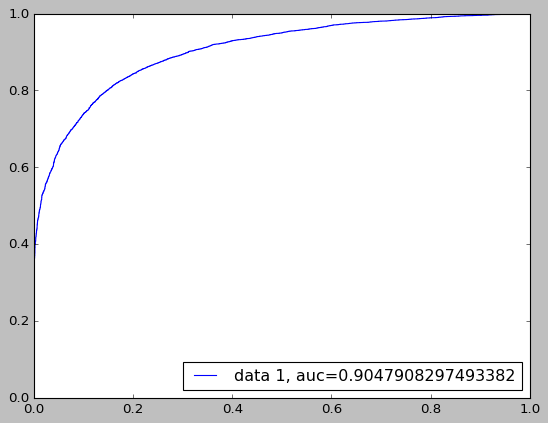

In [200]:
# aucroc
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

# Evaluating all the models:

In [201]:
recall_score

<function sklearn.metrics._classification.recall_score>

In [202]:
classifiers = ['Logistic Regression', 'Decision tree Clf', 'Random Forest CLf', 'Xgboost Clf']

train_accuracy = [train_accuracy_lr, train_accuracy_DTC,  train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_DTC,  test_accuracy_rf, test_accuracy_xgb_tuned]

precision_score = [test_precision_score_lr, test_precision_dt,  test_precision_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_dt,  test_recall_score_rf, test_recall_score_xgb_tuned]

f1_score = [test_f1_score_lr, test_f1_score_dt, test_f1_score_rf, test_f1_score_xgb_tuned]

In [203]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.752963,0.754685,0.693385,0.790244,0.738653
1,Decision tree Clf,0.708723,0.707866,0.643709,0.738432,0.687825
2,Random Forest CLf,0.999010,0.839569,0.810376,0.860606,0.834736
3,Xgboost Clf,0.899320,0.825173,0.781582,0.856209,0.817196


### **Plotting ROC AUC for all the models**

In [204]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

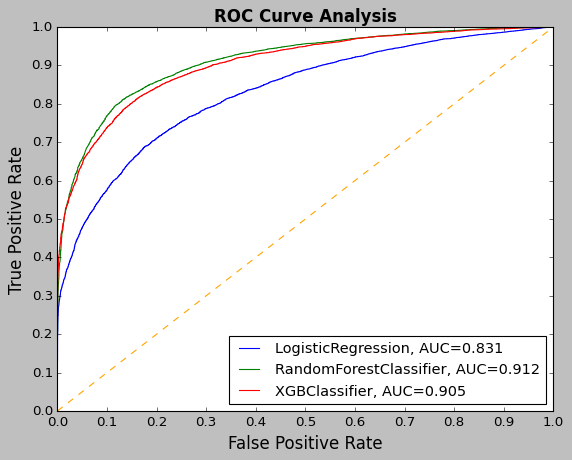

In [205]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conclusions:

1) After performing the various model we the get the best accuracy form the
  Random forest (83%) and XGBoost classifier (81%).

2) Logestic Regression is the least accurate as compared to other models
   performed.

3) Random forest classifier has the best precision and the recall balance.

4) Higher recall can be achieved if low precision is acceptable.

5) Model can be improved with more data and computational resources